# Solving TSP using VQE 

In [1]:
!which python

/opt/anaconda3/envs/quantum/bin/python


In [1]:
import qiskit 
import numpy as np 
import random
from qiskit_algorithms import VQE 
from qiskit_algorithms.optimizers import SLSQP 
from qiskit.circuit.library import TwoLocal
from qiskit_aer import Aer
from qiskit.quantum_info import SparsePauliOp 
from qiskit.primitives import sampler 

In [2]:
Z=SparsePauliOp('Z')
X=SparsePauliOp('X')
Y=SparsePauliOp('Y')
I=SparsePauliOp('I') 


x1=((1/2)*((I-Z)^I^I^I^I^I^I^I^I^I^I^I))
x2=((1/2)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^I))
x3=((1/2)*(I^I^(I-Z)^I^I^I^I^I^I^I^I^I))
x4=((1/2)*(I^I^I^(I-Z)^I^I^I^I^I^I^I^I))
x5=((1/2)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^I))
x6=((1/2)*(I^I^I^I^I^(I-Z)^I^I^I^I^I^I))
x7=((1/2)*(I^I^I^I^I^I^(I-Z)^I^I^I^I^I))
x8=((1/2)*(I^I^I^I^I^I^I^(I-Z)^I^I^I^I))
x9=((1/2)*(I^I^I^I^I^I^I^I^(I-Z)^I^I^I))
x10=((1/2)*(I^I^I^I^I^I^I^I^I^(I-Z)^I^I))
x11=((1/2)*(I^I^I^I^I^I^I^I^I^I^(I-Z)^I))
x12=((1/2)*(I^I^I^I^I^I^I^I^I^I^I^(I-Z)))

#Permutations 
x11x12= ((1/4)*(I^I^I^I^I^I^I^I^I^I^(I-Z)^(I-Z))) 
x11x2=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^(I-Z)^I))
x12x2=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)))
x2x3=((1/4)*(I^(I-Z)^(I-Z)^I^I^I^I^I^I^I^I^I))
x12x4=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^I^I^(I-Z)))
x12x5=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^(I-Z)))
x2x5=((1/4)*(I^(I-Z)^I^I^(I-Z)^I^I^I^I^I^I^I))
x3x5=((1/4)*(I^I^(I-Z)^I^(I-Z)^I^I^I^I^I^I^I))
x4x5=((1/4)*(I^I^I^(I-Z)^(I-Z)^I^I^I^I^I^I^I)) 
x2x6=((1/4)*(I^(I-Z)^I^I^I^(I-Z)^I^I^I^I^I^I))
x3x6=((1/4)*(I^I^(I-Z)^I^I^(I-Z)^I^I^I^I^I^I))
x4x6=((1/4)*(I^I^I^(I-Z)^I^(I-Z)^I^I^I^I^I^I))
x5x6=((1/4)*(I^I^I^I^(I-Z)^(I-Z)^I^I^I^I^I^I))
x11x7=((1/4)*(I^I^I^I^I^I^(I-Z)^I^I^I^(I-Z)^I))
x4x7=((1/4)*(I^I^I^(I-Z)^I^I^(I-Z)^I^I^I^I^I))
x6x7=((1/4)*(I^I^I^I^I^(I-Z)^(I-Z)^I^I^I^I^I))
x11x8=((1/4)*(I^I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I))
x3x8=((1/4)*(I^I^(I-Z)^I^I^I^I^(I-Z)^I^I^I^I))
x7x8=((1/4)*(I^I^I^I^I^I^(I-Z)^(I-Z)^I^I^I^I)) 
x10x11=((1/4)*(I^I^I^I^I^I^I^I^I^(I-Z)^(I-Z)^I))
x10x12=((1/4)*(I^I^I^I^I^I^I^I^I^(I-Z)^I^(I-Z)))
x10x4=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^(I-Z)^I^I))
x10x5=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^(I-Z)^I^I))
x10x7=((1/4)*(I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I^I))
x10x8=((1/4)*(I^I^I^I^I^I^I^(I-Z)^I^(I-Z)^I^I))
x3x9=((1/4)*(I^I^(I-Z)^I^I^I^I^I^(I-Z)^I^I^I))
x4x9=((1/4)*(I^I^I^(I-Z)^I^I^I^I^(I-Z)^I^I^I))
x6x9=((1/4)*(I^I^I^I^I^(I-Z)^I^I^(I-Z)^I^I^I))
x7x9=((1/4)*(I^I^I^I^I^I^(I-Z)^I^(I-Z)^I^I^I))
x8x9=((1/4)*(I^I^I^I^I^I^I^(I-Z)^(I-Z)^I^I^I))
x1x11=((1/4)*((I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)^I)) 
x1x12=((1/4)*((I-Z)^I^I^I^I^I^I^I^I^I^I^(I-Z)))
x1x2=((1/4)*((I-Z)^(I-Z)^I^I^I^I^I^I^I^I^I^I))
x1x3=((1/4)*((I-Z)^I^(I-Z)^I^I^I^I^I^I^I^I^I))
x1x8=((1/4)*((I-Z)^I^I^I^I^I^I^(I-Z)^I^I^I^I))
x1x9=((1/4)*((I-Z)^I^I^I^I^I^I^I^(I-Z)^I^I^I))
x4x10=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^(I-Z)^I^I))
x7x10=((1/4)*(I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I^I))
x8x11=((1/4)*(I^I^I^I^I^I^I^(I-Z)^I^I^(I-Z)^I))
x2x12=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)))
x5x12=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^(I-Z)))
x2x11=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^(I-Z)^I))
x2x12=((1/4)*(I^(I-Z)^I^I^I^I^I^I^I^I^I^(I-Z)))
x4x12=((1/4)*(I^I^I^(I-Z)^I^I^I^I^I^I^I^(I-Z)))
x5x10=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^(I-Z)^I^I))
x5x12=((1/4)*(I^I^I^I^(I-Z)^I^I^I^I^I^I^(I-Z)))


P=8
TspHam2=  12*x1 + 14*x2 + 17*x3 + 12*x4 + 15*x5 + 18*x6 + 14*x7 + 15*x8 + 29*x9 + 17*x10 + 18*x11 + 29*x12 + P*( - x4 - x7 - x10 + 2*x4x7 + 2*x4x10 + 2*x7x10) \
     + P*( - x1 - x8 - x11 + 2*x1x8 + 2*x1x11 + 2*x8x11) + P*(- x2 - x5 - x12 \
     + 2*x2x5 + 2*x2x12 + 2*x5x12) + P*(- x3 - x6 - x9 + 2*x3x6 + 2*x3x9 + 2*x6x9) \
     + P*(- x1- x2 - x3 + 2*x1x2 + 2*x1x3 + 2*x2x3) + P*(- x4 -x5 - x6 \
     + 2*x4x5 + 2*x4x6 + 2*x5x6) + P*(- x7 - x8 - x9 + 2*x7x8 + 2*x7x9 + 2*x8x9) \
     + P*(- x10 - x11- x12 + 2*x10x11 + 2*x10x12 + 2*x11x12) \
     + P*(- x2 - x3- x5 - x6 + x2x3 + x2x5 + x2x6 + x3x5 + x3x6 + x5x6) \
     + P*( - x1- x2 - x11 - x12 + x1x2 + x1x11 + x1x12 + x2x11 + x2x12 + x11x12) \
     + P*( - x1 - x3 - x8 - x9 + x1x3 + x1x8 + x1x9 + x3x8 + x3x9 + x8x9) \
     + P*(- x4 - x6 - x7 - x9 + x4x6 + x4x7 + x4x9 + x6x7 + x6x9 + x7x9) \
     + P*(-x4 - x5 - x10 - x12 + x4x5 + x4x10 + x4x12 + x5x10 + x5x12 + x10x12) \
     + P*(- x10 - x11 - x7 - x8 + x10x11 + x10x7 + x10x8 + x11x7 + x11x8 + x7x8) 



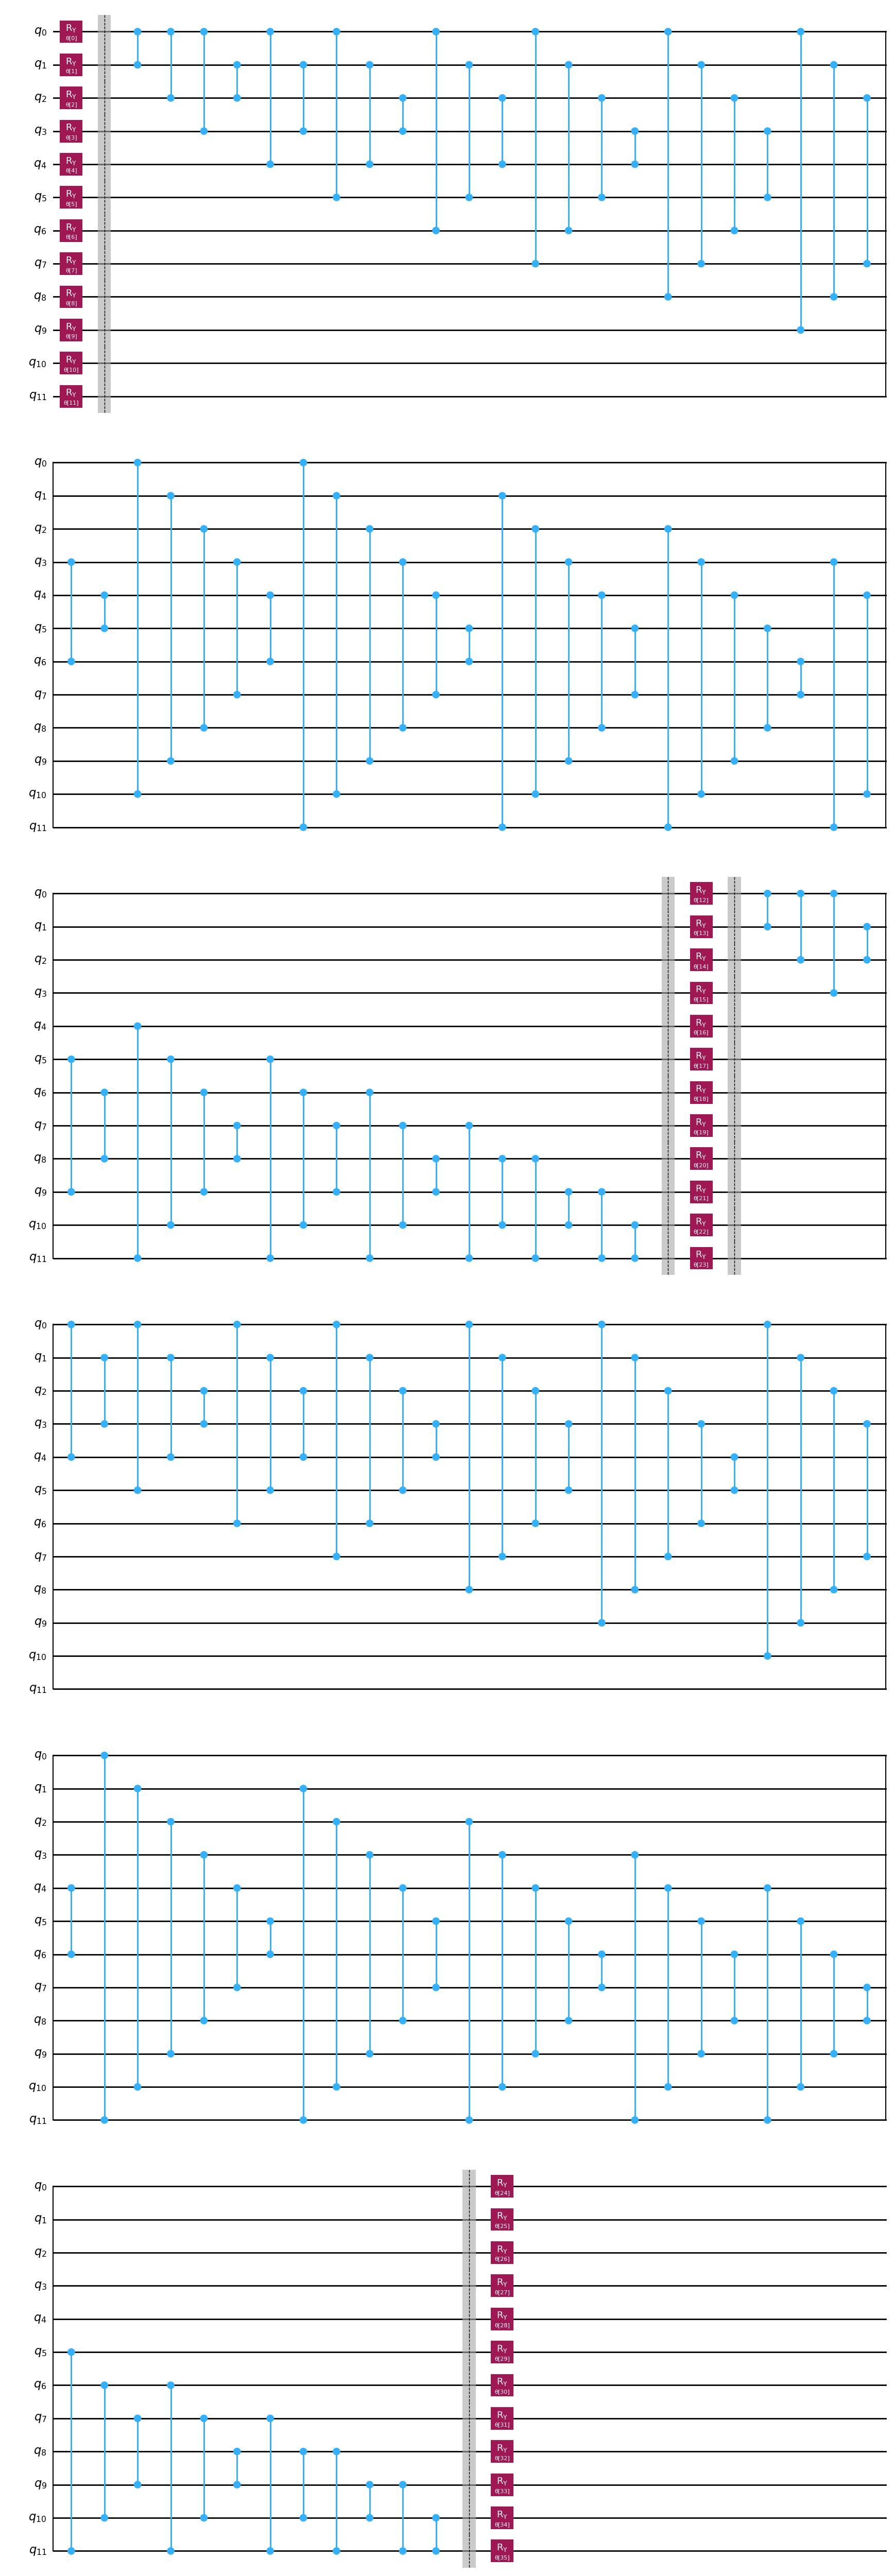

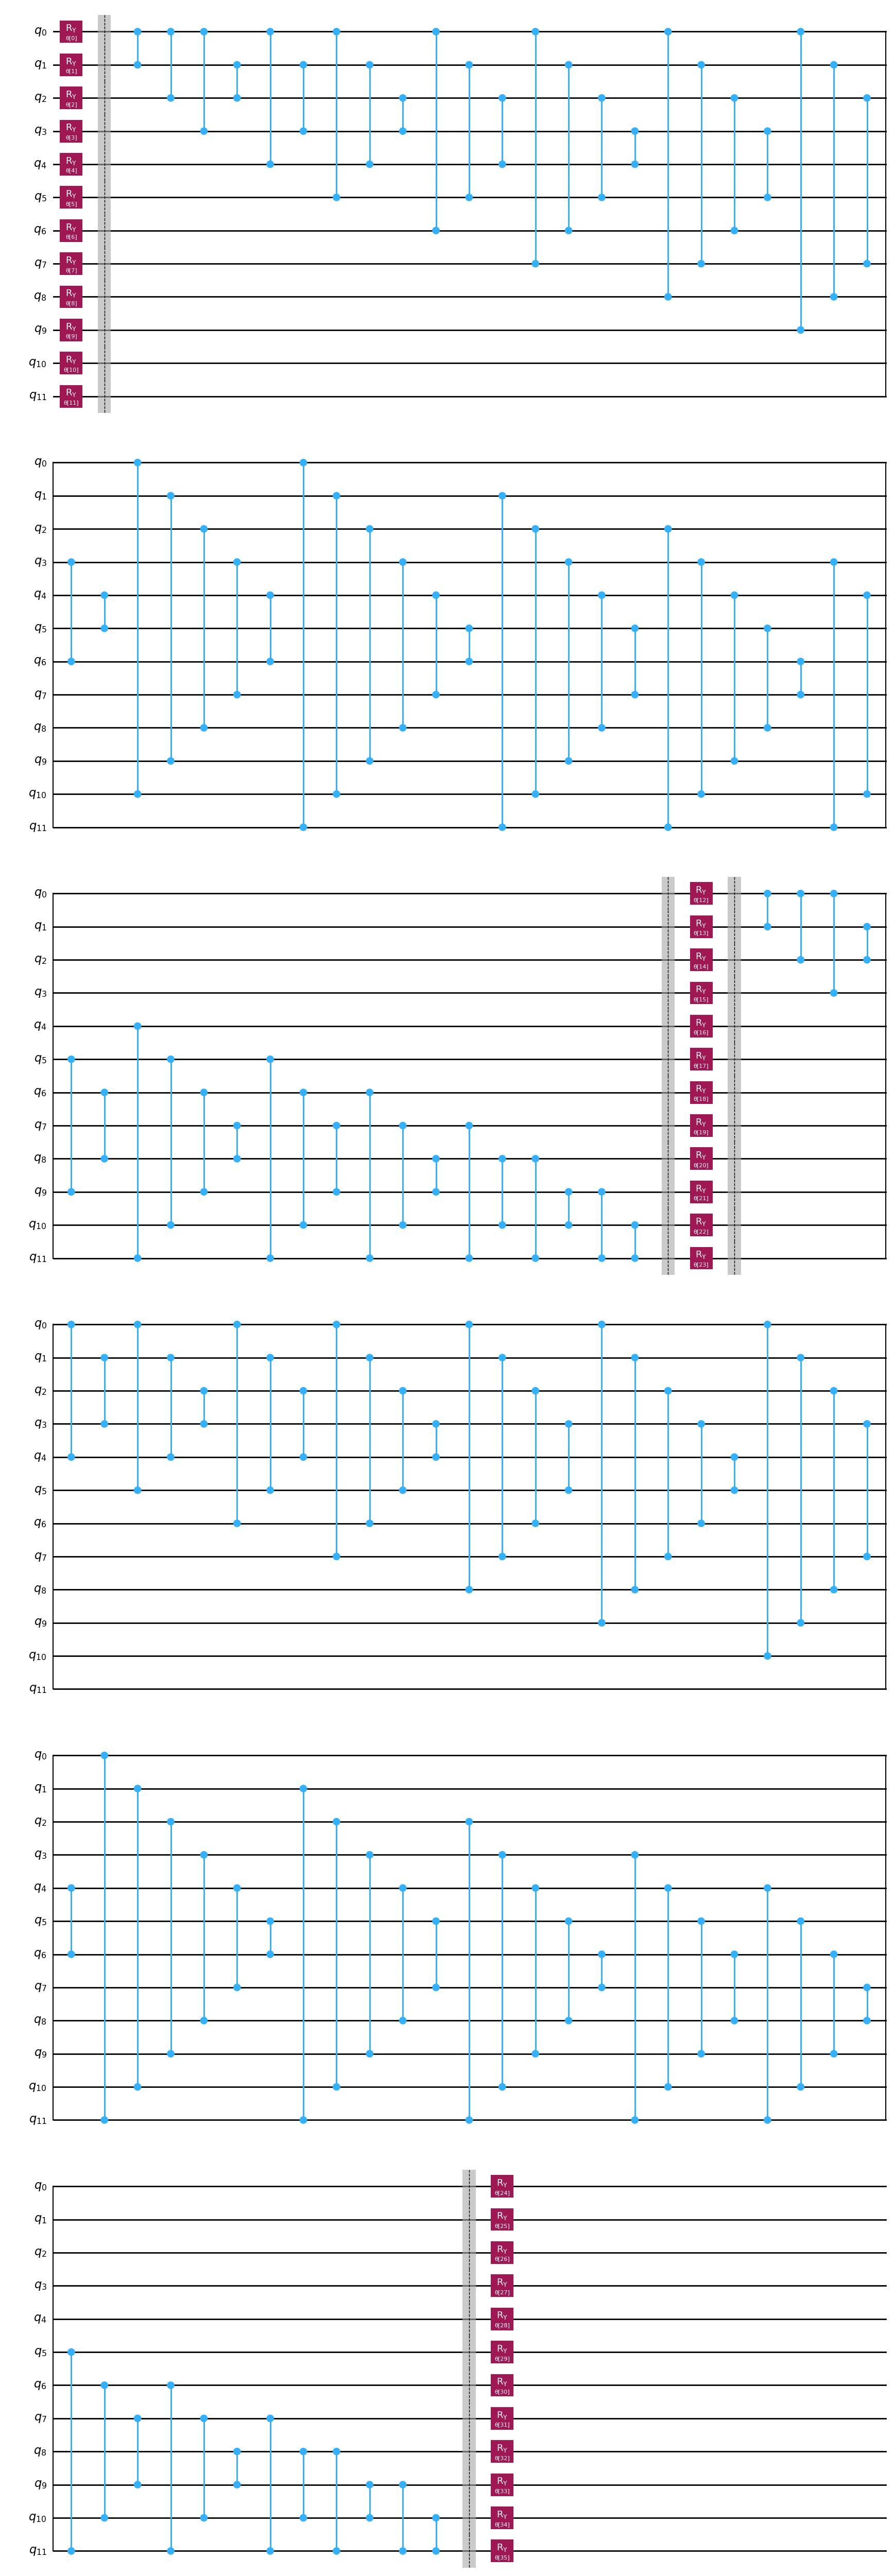

In [5]:
%matplotlib inline
num_qubits = 12
ansatz = TwoLocal(num_qubits,'ry', 'cz','full',reps=2, insert_barriers=True)
ansatz.decompose().draw(output='mpl')

In [4]:
seed = 1000
initial=[random.uniform(0, 2*np.pi) for i in range(36)]
opt = SLSQP(maxiter=1000)
#qi = sampler(Aer.get_backend('statevector_simulator'), shots=8000, seed_transpiler=seed, seed_simulator=seed)
#vqe = VQE(ansatz, optimizer=opt , quantum_instance=qi, initial_point=initial)  